In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the variables from the CSV files for modeling
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/X_train-raw.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/X_test-raw.csv')
X_validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/X_validation-raw.csv')

y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/y_train-raw.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/y_test-raw.csv')
y_validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/y_validation-raw.csv')

print("X and y variables loaded from CSV files.")

# Check that the loaded data matches the original
print(f"Loaded X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Loaded X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Loaded X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")

# Ensure that X_train, X_test, X_validation are float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_validation = X_validation.astype('float32')

# Ensure that y_train, y_test, y_validation are float32 or int32
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_validation = y_validation.astype('float32')

X and y variables loaded from CSV files.
Loaded X_train shape: (37802, 32), y_train shape: (37802, 1)
Loaded X_test shape: (4724, 32), y_test shape: (4724, 1)
Loaded X_validation shape: (4724, 32), y_validation shape: (4724, 1)


In [ ]:
# Extract column names from X_train
feature_names = X_train.columns.tolist()
print(feature_names)

['F', 'M', 'asian', 'black', 'hispanic', 'native', 'other', 'unknown', 'white', 'sedative', 'vasopressor', 'vent', 'aniongap_avg', 'bicarbonate_avg', 'bun_avg', 'chloride_avg', 'creat', 'diasbp_mean', 'glucose_avg', 'heartrate_mean', 'hematocrit_avg', 'hemoglobin_avg', 'potassium_avg', 'resprate_mean', 'sodium_avg', 'spo2_mean', 'sysbp_mean', 'uo_rt_12hr', 'uo_rt_24hr', 'uo_rt_6hr', 'wbc_avg', 'age']


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import time

# Concatenate X and y for both train and test datasets to create a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Convert the pandas DataFrame to a DMatrix, which is the data structure XGBoost uses
train_matrix = xgb.DMatrix(data=X_train, label=y_train)
test_matrix = xgb.DMatrix(data=X_test, label=y_test)

# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'n_estimators': 70,
    'max_depth': 7,
    'min_child_weight': 3,
    'gamma': 0.5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': ['auc', 'error', 'logloss']
}

# Train the XGBoost model
start_time = time.time()
xgb_model = xgb.train(
    params=params,
    dtrain=train_matrix,
    num_boost_round=70,
    evals=[(test_matrix, 'eval')],
    early_stopping_rounds=40,
    verbose_eval=True
)
end_time = time.time()
print(f"Time taken to train the XGBoost model: {end_time - start_time:.2f} seconds")

# Save the model
xgb_model.save_model('/content/drive/MyDrive/Colab Notebooks/AKI/final/final_models/xgb_raw.xgb')
print("Model saved as 'model_xgb1.xgb'.")

# Evaluate the model on the test set
preds = xgb_model.predict(test_matrix)
y_pred = np.round(preds)  # Convert probabilities to binary output (0 or 1)

# Manually calculate accuracy if needed
y_test_array = y_test.to_numpy().flatten()  # Convert y_test to a numpy array and flatten it
accuracy = np.mean(y_pred == y_test_array)
print(f"Test Accuracy: {accuracy:.4f}")

# Convert y_validation to a numpy array
y_validation_array = y_validation.to_numpy().flatten()

# Optionally, include a validation step (if X_validation and y_validation are defined)
if X_validation is not None and y_validation is not None:
    validation_matrix = xgb.DMatrix(data=X_validation, label=y_validation)
    val_preds = xgb_model.predict(validation_matrix)
    y_val_pred = np.round(val_preds)
    val_accuracy = np.mean(y_val_pred == y_validation_array)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

# Note: To manually calculate accuracy, you can also extract the predicted labels
predictions_rf = xgb_model.predict(test_matrix)
y_pred_rf = np.round(predictions_rf).astype(int)  # Convert probabilities to binary output (0 or 1)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:58:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-auc:0.70379	eval-error:0.22333	eval-logloss:0.52259
[1]	eval-auc:0.72683	eval-error:0.22333	eval-logloss:0.51265
[2]	eval-auc:0.73275	eval-error:0.22333	eval-logloss:0.50455
[3]	eval-auc:0.73916	eval-error:0.22333	eval-logloss:0.49697
[4]	eval-auc:0.74244	eval-error:0.22058	eval-logloss:0.49133
[5]	eval-auc:0.74351	eval-error:0.21761	eval-logloss:0.48623
[6]	eval-auc:0.74794	eval-error:0.21401	eval-logloss:0.48186
[7]	eval-auc:0.74737	eval-error:0.21296	eval-logloss:0.47894
[8]	eval-auc:0.74875	eval-error:0.21105	eval-logloss:0.47541
[9]	eval-auc:0.74944	eval-error:0.20872	eval-logloss:0.47274
[10]	eval-auc:0.75014	eval-error:0.20766	eval-logloss:0.47057
[11]	eval-auc:0.74987	eval-error:0.20576	eval-logloss:0.46864
[12]	eval-auc:0.74997	eval-error:0.20555	eval-logloss:0.46680
[13]	eval-auc:0.75048	eval-error:0.20470	eval-logloss:0.46507
[14]	eval-auc:0.75045	eval-error:0.20406	eval-logloss:0.46394
[15]	eval-auc:0.75156	eval-error:0.20322	eval-logloss:0.46230
[16]	eval-auc:0.75

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:58:49] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


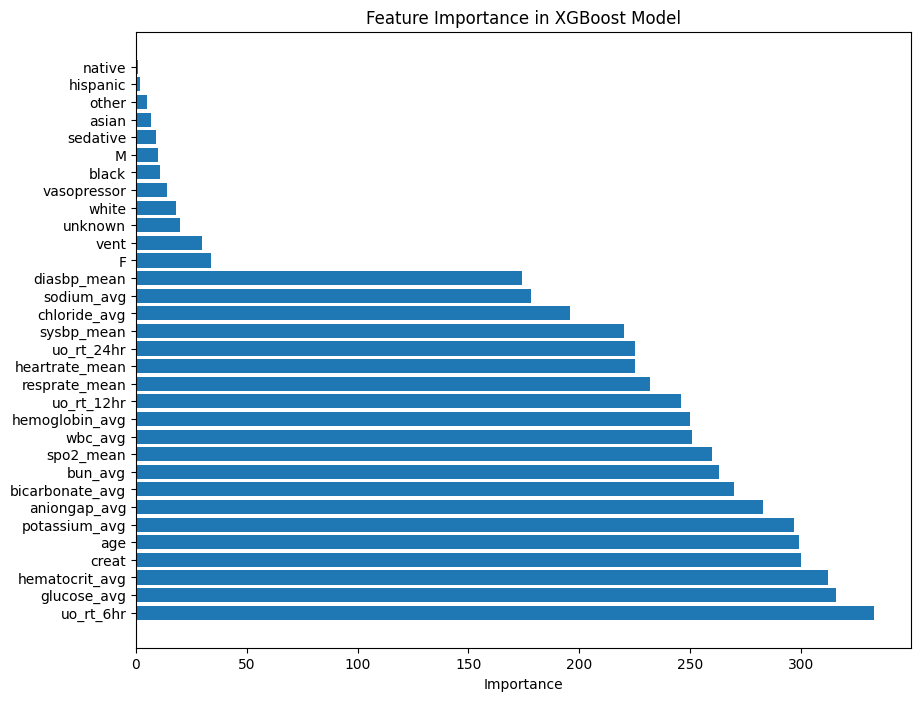

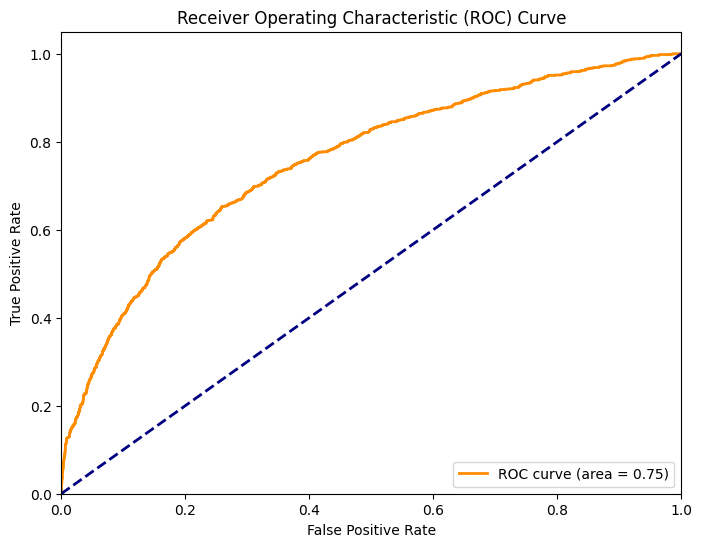

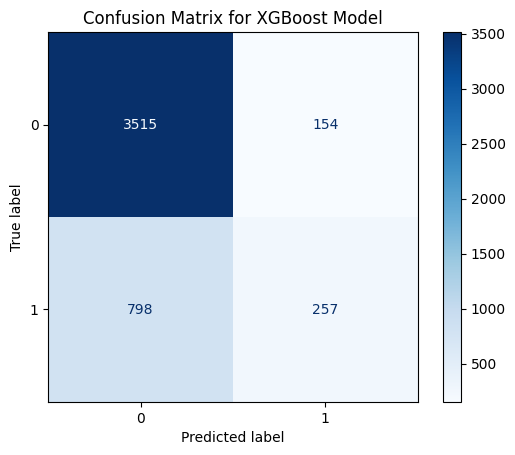

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import time

# Step 1: Feature Importance
importance_type = 'weight'  # You can also use 'gain', 'cover', or 'total_gain', 'total_cover'
importance = xgb_model.get_score(importance_type=importance_type)
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their corresponding importance values
feature_names_xgb = [k for k, v in sorted_importance]
importances_xgb = [v for k, v in sorted_importance]

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names_xgb, importances_xgb)
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost Model')
plt.show()

# Step 2: Visualize Model Performance

# Predict probabilities on the test set
y_prob_xgb = preds
y_true_xgb = y_test_array

# ROC Curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_true_xgb, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 3: Confusion Matrix
cm_xgb = confusion_matrix(y_true_xgb, y_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])

disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve, f1_score
from sklearn.utils import resample

# Compute performance metrics and confidence intervals
def compute_confidence_interval(y_test, predictions, n_bootstraps=1000, alpha=0.95):
    y_test = np.array(y_test)  # Ensure y_test is a NumPy array
    bootstrapped_scores = []
    for i in range(n_bootstraps):
        indices = resample(np.arange(len(predictions)))
        if len(np.unique(y_test[indices])) < 2:
            continue
        score = f1_score(y_test[indices], predictions[indices])
        bootstrapped_scores.append(score)
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    lower = sorted_scores[int((1.0-alpha)/2.0 * len(sorted_scores))]
    upper = sorted_scores[int((alpha+(1.0-alpha)/2.0) * len(sorted_scores))]
    return lower, upper

def performance(y_test, pred_probabilities):
    # Convert y_test to a NumPy array
    y_test = np.array(y_test)

    # Performance metrics
    fpr, tpr, thresholds = roc_curve(y_test, pred_probabilities)
    roc_auc = roc_auc_score(y_test, pred_probabilities, average='micro')
    precision, recall, _ = precision_recall_curve(y_test, pred_probabilities)
    pr_auc = auc(recall, precision)
    optimal_cut_off = round(thresholds[np.argmax(tpr - fpr)], 4)
    predictions = np.where(pred_probabilities > optimal_cut_off, 1, 0)
    brier = round(f1_score(y_test, predictions), 3)

    # Compute F1 score
    f1 = f1_score(y_test, predictions)
    lower, upper = compute_confidence_interval(y_test, predictions)

    print("Area Under ROC Curve: %0.2f" % roc_auc)
    print("Brier score : {:.3f}".format(brier))
    print("F1 score : {:.2f}".format(f1))
    print("95% Confidence interval for F1 score: [{:.2f}, {:.2f}]".format(lower, upper))

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

Area Under ROC Curve: 0.75
Brier score : 0.511
F1 score : 0.51
95% Confidence interval for F1 score: [0.49, 0.53]


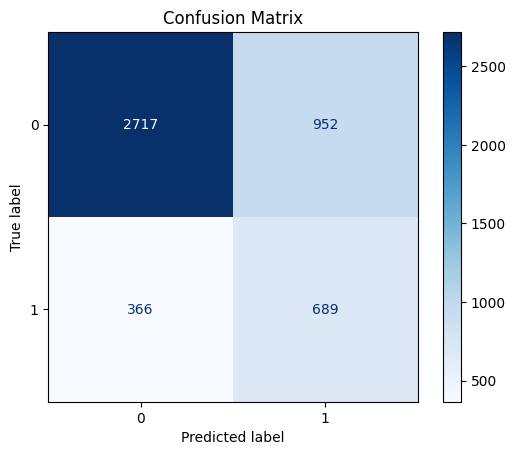

In [ ]:
# Evaluate performance on test set
performance(y_test_array, preds)

#Normalized

In [ ]:
import pandas as pd

# Load the variables from the CSV files for modeling
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/X_train-final.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/X_test-final.csv')
X_validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/X_validation-final.csv')

y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/y_train-final.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/y_test-final.csv')
y_validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AKI/final/input_data/y_validation-final.csv')

print("X and y variables loaded from CSV files.")

# Check that the loaded data matches the original
print(f"Loaded X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"Loaded X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Loaded X_validation shape: {X_validation.shape}, y_validation shape: {y_validation.shape}")

# Ensure that X_train, X_test, X_validation are float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_validation = X_validation.astype('float32')

# Ensure that y_train, y_test, y_validation are float32 or int32
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_validation = y_validation.astype('float32')

X and y variables loaded from CSV files.
Loaded X_train shape: (37802, 32), y_train shape: (37802, 1)
Loaded X_test shape: (4724, 32), y_test shape: (4724, 1)
Loaded X_validation shape: (4724, 32), y_validation shape: (4724, 1)


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
import time

# Concatenate X and y for both train and test datasets to create a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Convert the pandas DataFrame to a DMatrix, which is the data structure XGBoost uses
train_matrix = xgb.DMatrix(data=X_train, label=y_train)
test_matrix = xgb.DMatrix(data=X_test, label=y_test)

# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'n_estimators': 70,
    'max_depth': 7,
    'min_child_weight': 3,
    'gamma': 0.5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': ['auc', 'error', 'logloss']
}

# Train the XGBoost model
start_time = time.time()
xgb_model = xgb.train(
    params=params,
    dtrain=train_matrix,
    num_boost_round=70,
    evals=[(test_matrix, 'eval')],
    early_stopping_rounds=40,
    verbose_eval=True
)
end_time = time.time()
print(f"Time taken to train the XGBoost model: {end_time - start_time:.2f} seconds")

# Save the model
xgb_model.save_model('/content/drive/MyDrive/Colab Notebooks/AKI/final/final_models/xgb_final.xgb')
print("Model saved as 'model_xgb1.xgb'.")

# Evaluate the model on the test set
preds = xgb_model.predict(test_matrix)
y_pred = np.round(preds)  # Convert probabilities to binary output (0 or 1)

# Manually calculate accuracy if needed
y_test_array = y_test.to_numpy().flatten()  # Convert y_test to a numpy array and flatten it
accuracy = np.mean(y_pred == y_test_array)
print(f"Test Accuracy: {accuracy:.4f}")

# Convert y_validation to a numpy array
y_validation_array = y_validation.to_numpy().flatten()

# Optionally, include a validation step (if X_validation and y_validation are defined)
if X_validation is not None and y_validation is not None:
    validation_matrix = xgb.DMatrix(data=X_validation, label=y_validation)
    val_preds = xgb_model.predict(validation_matrix)
    y_val_pred = np.round(val_preds)
    val_accuracy = np.mean(y_val_pred == y_validation_array)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

# Note: To manually calculate accuracy, you can also extract the predicted labels
predictions_rf = xgb_model.predict(test_matrix)
y_pred_rf = np.round(predictions_rf).astype(int)  # Convert probabilities to binary output (0 or 1)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:12:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-auc:0.70092	eval-error:0.22333	eval-logloss:0.52254
[1]	eval-auc:0.72298	eval-error:0.22333	eval-logloss:0.51256
[2]	eval-auc:0.72671	eval-error:0.22333	eval-logloss:0.50455
[3]	eval-auc:0.73457	eval-error:0.22333	eval-logloss:0.49687
[4]	eval-auc:0.74005	eval-error:0.21867	eval-logloss:0.49099
[5]	eval-auc:0.74285	eval-error:0.21634	eval-logloss:0.48599
[6]	eval-auc:0.74742	eval-error:0.21507	eval-logloss:0.48155
[7]	eval-auc:0.74760	eval-error:0.21253	eval-logloss:0.47798
[8]	eval-auc:0.74870	eval-error:0.21147	eval-logloss:0.47467
[9]	eval-auc:0.74954	eval-error:0.21041	eval-logloss:0.47189
[10]	eval-auc:0.75105	eval-error:0.20957	eval-logloss:0.46950
[11]	eval-auc:0.75230	eval-error:0.20936	eval-logloss:0.46746
[12]	eval-auc:0.75285	eval-error:0.20830	eval-logloss:0.46562
[13]	eval-auc:0.75383	eval-error:0.20787	eval-logloss:0.46384
[14]	eval-auc:0.75508	eval-error:0.20618	eval-logloss:0.46224
[15]	eval-auc:0.75545	eval-error:0.20597	eval-logloss:0.46073
[16]	eval-auc:0.75

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:13:05] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


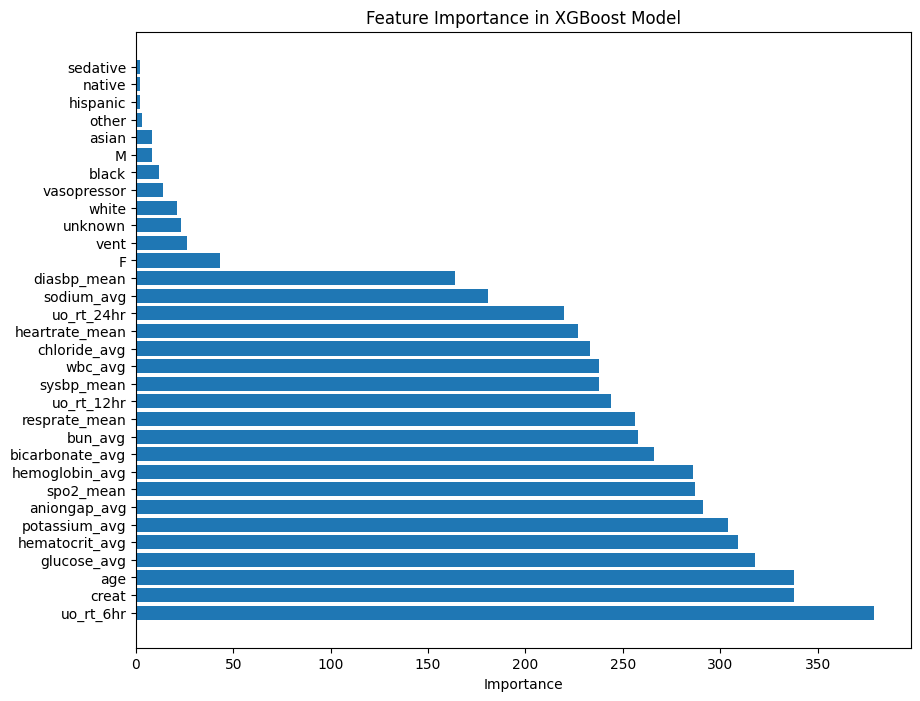

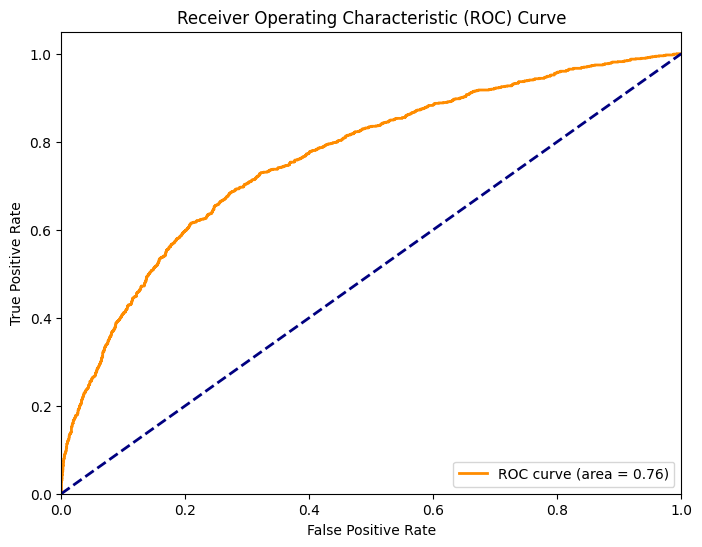

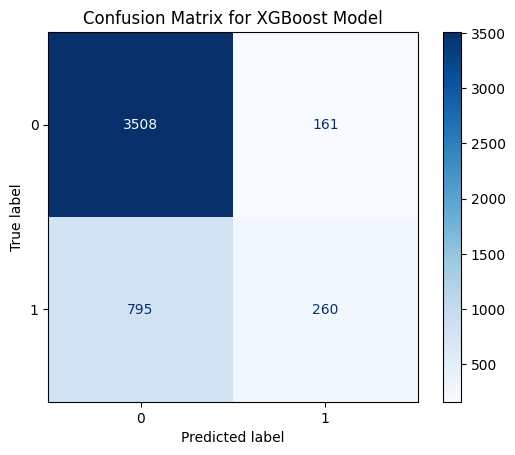

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import time

# Step 1: Feature Importance
importance_type = 'weight'  # You can also use 'gain', 'cover', or 'total_gain', 'total_cover'
importance = xgb_model.get_score(importance_type=importance_type)
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their corresponding importance values
feature_names_xgb = [k for k, v in sorted_importance]
importances_xgb = [v for k, v in sorted_importance]

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_names_xgb, importances_xgb)
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost Model')
plt.show()

# Step 2: Visualize Model Performance

# Predict probabilities on the test set
y_prob_xgb = preds
y_true_xgb = y_test_array

# ROC Curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_true_xgb, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 3: Confusion Matrix
cm_xgb = confusion_matrix(y_true_xgb, y_pred)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])

disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

Area Under ROC Curve: 0.76
Brier score : 0.520
F1 score : 0.52
95% Confidence interval for F1 score: [0.50, 0.54]


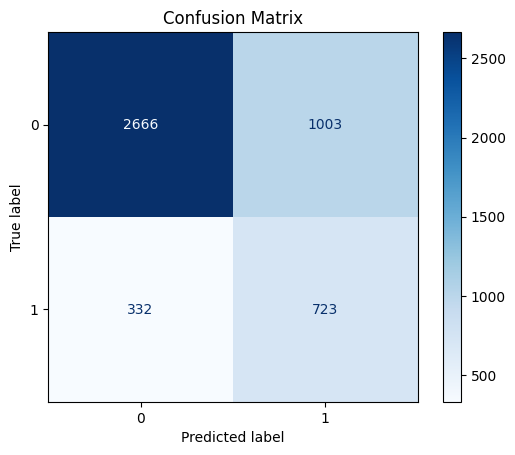

In [ ]:
# Evaluate performance on test set
performance(y_test_array, preds)

# CARLA

In [ ]:
!pip uninstall -y protobuf numpy pandas scikit-learn tensorflow torch torchvision h5py keras xgboost


Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Successfully uninstalled pandas-2.1.4
Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: torch 2.3.1+cu121
Uninstalling torch-2.3.1+cu121:
  Successfully uninstalled torch-2.3.1+cu121
Found existing installation: torchvision 0.18.1+cu121
Uninstalling torchvision-0.18.1+cu121:
  Successfully uninstalled torchvision-0.18.1+cu121
Found existing installation: h5py 3.11.0
Uninstalling h5py-3.11.0:
  Successfully uninstalled h5py-3.11.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
Found existing installation: xgboost 2.1.

In [ ]:
!pip install protobuf<=3.21
!pip install lime==0.2.0.1
!pip install mip==1.12.0
!pip install numpy==1.19.4
!pip install pandas==1.1.4
!pip install recourse==1.0.0
!pip install scikit-learn==0.23.2
!pip install tensorflow==1.14.0
!pip install torch==1.7.0
!pip install torchvision==0.8.1
!pip install h5py==2.10.0
!pip install dice-ml==0.5
!pip install ipython
!pip install keras==2.3.0
!pip install xgboost==1.4.2
!pip install causalgraphicalmodels==0.0.4


/bin/bash: line 1: =3.21: No such file or directory
  Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.32.1 requires torch>=1.10.0, which is not installed.
altair 4.2.2 requires pandas>=0.18, which is not installed.
arviz 0.18.0 requires pandas>=1.5.0, which is not installed.
bigframes 1.13.0 requires pandas>=1.5.0, which is not installed.
bokeh 3.4.3 requires pandas>=1.2, which is not installed.
bqplot 0.12.43 requires pandas<3.0.0,>=1.0.0, which is not installed.
carla-recourse 0.0.5 requires causalgraphicalmodels==0.0.4, which is not installed.
carla-recourse 0.0.5 requires dic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.6/377.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
carla-recourse 0.0.5 requires causalgraphicalmodels==0.0.4, which is not installed.
carla-recourse 0.0.5 requires tensorflow==1.14.0, which is not installed.
carla-recourse 0.0.5 requires torch==1.7.0, which is not installed.
carla-recourse 0.0.5 requires torchvision==0.8.1, which is not installed.
carla-recourse 0.0.5 requires xgboost==1.4.2, which is not installed.
carla-recourse 0.0.5 requires h5py==2.10.0, but you have h5py 3.11.0 which is incompatible.
carla-recourse 0.0.5 requires numpy==1.19.4, but you have numpy 2.0.1 which is incompatible.
carla-recourse 0.0.5 requires pand

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
carla-recourse 0.0.5 requires causalgraphicalmodels==0.0.4, which is not installed.
carla-recourse 0.0.5 requires tensorflow==1.14.0, which is not installed.
carla-recourse 0.0.5 requires torch==1.7.0, which is not installed.
carla-recourse 0.0.5 requires torchvision==0.8.1, which is not installed.
carla-recourse 0.0.5 requires h5py==2.10.0, but you have h5py 3.11.0 which is incompatible.
carla-recourse 0.0.5 requires numpy==1.19.4, but you have numpy 2.0.1 which is incompatible.
carla-recourse 0.0.5 requires pandas==1.1.4, but you have pandas 2.2.2 which is incompatible.
carla-recourse 0.0.5 requires scikit-learn==0.23.2, but you have scikit-learn 1.5.1 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
carla-recourse 0.0.5 requires tensorflow==1.14.0, which is not installed.
carla-recourse 0.0.5 requires torch==1.7.0, which is not installed.
carla-recourse 0.0.5 requires torchvision==0.8.1, which is not installed.
carla-recourse 0.0.5 requires h5py==2.10.0, but you have h5py 3.11.0 which is incompatible.
carla-recourse 0.0.5 requires numpy==1.19.4, but you have numpy 2.0.1 which is incompatible.
carla-recourse 0.0.5 requires pandas==1.1.4, but you have pandas 2.2.2 which is incompatible.
carla-recourse 0.0.5 requires scikit-learn==0.23.2, but you have scikit-learn 1.5.1 which is incompatible.


In [ ]:
!pip install lime==0.2.0.1 mip==1.12.0 recourse==1.0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 12.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a39b2f41e21f14e94929d2d7d071bdc76dd67b61afc252ff43da2e1fb5c8f991
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip uninstall numpy

Found existing installation: numpy 2.0.1
Uninstalling numpy-2.0.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.10/dist-packages/numpy-2.0.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.0.1


In [ ]:
!pip install numpy==1.19


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip uninstall pandas

In [ ]:
!pip install pandas==1.1.4

  Using cached pandas-1.1.4.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pandas
Failed to build pandas
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pandas)


In [ ]:
!pip uninstall scikit-lear

In [ ]:
!pip install scikit-learn==0.23.2

In [ ]:
!pip install "protobuf<=3.21"
!pip install "lime<=0.2.0.1"
!pip install "mip<=1.12.0"
!pip install "numpy<=1.19.4"
!pip install "pandas<=1.1.4"
!pip install "recourse<=1.0.0"
!pip install "scikit-learn<=0.23.2"
!pip install "tensorflow<=1.14.0"
!pip install "torch<=1.7.0"
!pip install "torchvision<=0.8.1"
!pip install "h5py<=2.10.0"
!pip install "dice-ml<=0.5"
!pip install "keras<=2.3.0"
!pip install "xgboost<=1.4.2"
!pip install "causalgraphicalmodels<=0.0.4"

  Using cached numpy-1.19.4.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached pandas-1.1.4.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem

In [ ]:
!pip uninstall carla-recourse

Found existing installation: carla-recourse 0.0.5
Uninstalling carla-recourse-0.0.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/carla/*
    /usr/local/lib/python3.10/dist-packages/carla_recourse-0.0.5.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled carla-recourse-0.0.5


In [ ]:
!pip install carla-recourse

  Using cached carla_recourse-0.0.5-py3-none-any.whl.metadata (7.3 kB)
  Using cached numpy-1.19.4.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pandas-1.1.4.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem wit

In [ ]:
!pip install carla-recourse --no-deps

  Using cached carla_recourse-0.0.5-py3-none-any.whl.metadata (7.3 kB)
Using cached carla_recourse-0.0.5-py3-none-any.whl (138 kB)


In [ ]:
import carla
from carla import OnlineCatalog

# Check CARLA version and installed packages
print(f"CARLA version: {carla.__version__}")


ModuleNotFoundError: No module named 'tensorflow'